# INM702 - Coursework TASK 1

## 1.1 Import required libraries for task

In [3]:
import numpy as np
import pandas as pd
import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler


In [4]:
# Use keras to import MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## 1.2 Data inspection and preparation

Before procesing, we need to check the MNIST Data.
First we plot one sample image to see what our input data look like

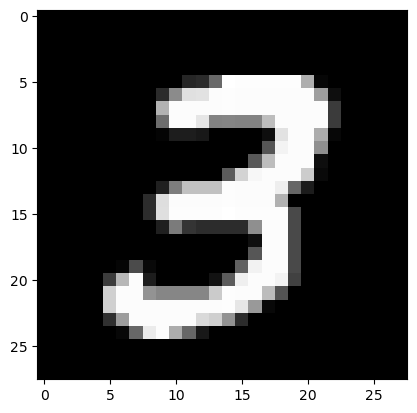

The number shown on image is: 3


In [4]:
# Plot a sample image
sample = 7
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
print("The number shown on image is:", y_train[sample])

Then we print the size of the arrays we have created just to make sure they are as expected

In [5]:
print ("shape of X_train {}".format(X_train.shape))
print ("shape of X_test {}".format(X_test.shape))
print ("shape of y_train {}".format(y_train.shape))
print ("shape of y_test {}".format(y_test.shape))


shape of X_train (60000, 28, 28)
shape of X_test (10000, 28, 28)
shape of y_train (60000,)
shape of y_test (10000,)


Finally we print one data sample to see what it is like

In [6]:
X_train[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

We can see that our input is a 28x28 array of integers with values in the range 0 to 255. These correspond to the input image size which is 28x28 pixels and the values represent the colour intensity of each pixel in the image in the greyscale range. 0 is black, 255 is white and the values in between are shades of grey. This can also be confirmed by the image that we have plotted above.   

In order to feed the data into our NN we need to "flatten" the 28x28 array into one dimension array containing all 784 elements and preserving the total number of input samples. We print the resulting size.

In [5]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print ("new shape of X_train {}".format(X_train.shape))
print ("new shape of X_test {}".format(X_test.shape))
X_train[7]

new shape of X_train (60000, 784)
new shape of X_test (10000, 784)


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105, 255, 253,
       253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 22

Since all our features are integer values that range from 0 to 255 it is not absolutely necessary to standardize our input data. However we will perform a simple scaling of the data by dividing all values by the max value 255

In [6]:
X_train = X_train/255
X_train[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 2.1 Build Neural Network Architecture

In [11]:
# We will be building a Neural Network with 2 hidden layers
# layer 1 will have 16 nodes, layer 2 will have 16 nodes and the output is 10 nodes

def init_params():

  #Initialise layer's weights using a uniform distribution in range -0.5 to 0.5
  #Initialise bias values to 0
  W1 = np.random.uniform(-0.5, 0.5, (16,784))
  b1 = np.zeros((16,1))

  #Hidden layer's weight
  W2 = np.random.uniform(-0.5,0.5, (16,16))
  b2 = np.zeros((16,1))

  # Second Hidden layer' weight
  W3 = np.random.uniform(-0.5,0.5 ,(10,16))  # Weights are still to big
  b3 = np.zeros((10,1))

  return W1,b1,W2,b2,W3,b3

W1,b1,W2,b2,W3,b3 = init_params()


## 2.2 Build Activation functions and Forward Propagation

In [14]:
# Define ReLU function
def ReLU(Z):

  return np.maximum(0,Z)

# Define Softmax
def softmax(Z): # CHECK IT !!!

  # for one examples is (np.exp(Z) / np.sum( np.exp(Z)))

    Z_exp = np.exp(Z - np.max(Z, axis=0))
    sum_Z_exp = np.sum(Z_exp, axis=0)
    softmax_output = Z_exp / sum_Z_exp

    return softmax_output

# Define Sigmoid
def sigmoid(Z):

  return 1 / 1+ np.exp(-Z)

def forward_prop(X,W1,b1,W2,b2,W3,b3,dropout = 0.0):
  #We are assuming to have 3 layered neural network 
  #D1 and D2 are mask layers for dropout 

  D1= None
  D2= None

  # if there is no dropout layer
  if (dropout) == 0.0:
    #Forward propagation with 3 layered neural network

    #Initialize  Z
    #Since X has shape (6000,784) and our W1 has shape (16,784) for the dot product we need to use Transpose of X

    Z1 = W1.dot(X.T)+ b1
    #Activation with ReLU to given linear regression to feed neural network
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2

    A2 = ReLU(Z2)

    Z3 = W3.dot(A2) + b3
    #We use softmax at the output layer to have probabilistic set of values
    A3 = softmax(Z3)

 

  else: # If there is a dropout layer, we are going to build mask for each layer
    #Forward propagation with 3 layered neural network 

    Z1 = W1.dot(X.T)+ b1
    #Activation with ReLU to given linear regression to feed neural network
    A1 = ReLU(Z1)
    '''
    This line of code for dropout inspired from Andrew Ng's Deep Learning Specialization Course
    https://www.youtube.com/watch?v=D8PJAL-MZv8
    '''
    #Create a mask for A1 to use probability of dropout from user
    D1 = np.random.rand(*A1.shape) > dropout 
    #D1 is mask matrix that checks the probability of dropout.
    #If the probability is bigger than dropout, it will be 1 otherwise 0

    #Apply mask to A1
    A1 = A1 * D1
    #Normalize A1 to not change expected value of A1 
    A1 = A1 / (1-dropout) 
    # It scales A to not to change expected value of A1 as keeping  probability 
    #keeeping probability means 1 - dropout probability

   
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    
    #Create a mask for second hidden layer and use probability of dropout from user
    D2 = np.random.rand( *A2.shape) > dropout
    A2 = A2 * D2
    A2 = A2 / (1-dropout)

    Z3 = W3.dot(A2) + b3
    #At the end use softmax in the output layer to obtain probabilistic values
    A3 = softmax(Z3)

  return A1,A2,A3,D1,D2

A1,A2,A3,D1,D2 = forward_prop(X_train,W1,b1,W2,b2,W3,b3)

print(A3)






[[2.66321625e-03 1.61040993e-04 3.59428802e-02 ... 4.45238874e-03
  1.31382294e-03 9.30557610e-03]
 [2.54553916e-03 7.36302258e-04 2.28459513e-01 ... 4.75547115e-03
  1.65177875e-03 5.43604363e-03]
 [3.08501714e-01 2.24470478e-01 9.08149582e-02 ... 3.16821820e-01
  2.80183205e-01 9.54753195e-02]
 ...
 [5.16808019e-02 4.15957566e-02 1.26416200e-01 ... 3.40730921e-02
  1.08086003e-01 3.23472649e-02]
 [4.33317304e-02 1.05103313e-01 2.42257595e-01 ... 4.65382576e-02
  5.40820869e-02 2.78392510e-02]
 [3.15814524e-01 4.60311157e-01 1.18957151e-01 ... 4.34459989e-01
  2.26956461e-01 3.77541796e-01]]


In [15]:
print(A1.shape[1])

60000


## 2.3 Back-Propagation with One-hot and derivative of activaton functions

In [16]:
def one_hot(Y): # CHECK IT !!
  num_classes = np.max(Y) + 1

  one_hot = np.zeros((Y.size,num_classes))
  one_hot[np.arange(Y.size), Y] = 1

  return one_hot.T

def derivative_ReLU(Z):
  #Do we need to check between 0-1 ?
  return Z > 0

#Focus on backpropagation !!! Check how its works ! 
def backward_prop(X, Y, W1, b1, W2, b2, W3, b3, A1, A2, A3,D1, D2, dropout = 0.0): # CHECK IT !!!!

  m = Y.size
  Y = one_hot(Y)
  #if dropout is not used

  if (dropout) == 0.0:
    
    #One hot encoded to see each labels in matrix as 1
    

    #Derivate of cost function with respect to z3
    dZ3 = A3 - Y
    dW3 = (1/m) * dZ3.dot(A2.T)
    dB3 = (1/m) * np.sum(dZ3,axis = 1,keepdims=True)

    #Derivate for second hidden layer
    dA2 = np.dot(W3.T,dZ3)
    dZ2 =  dA2  * derivative_ReLU(A2)
    dW2 = (1/ m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2,axis =1,keepdims=True)

    #Derivate for first hidden layer

    dA1 = np.dot(W2.T,dZ2)
    dZ1 = dA1 * derivative_ReLU(A1)
    dW1 = (1/m) * dZ1.dot(X)
    dB1 =(1/m) * np.sum(dZ1, axis = 1,keepdims=True)

  else: #If dropout is used

    #Derivate of cost function with respect to z3
    dZ3 = A3 - Y
    dW3 = (1/m) * dZ3.dot(A2.T)
    dB3 = (1/m) * np.sum(dZ3,axis = 1,keepdims=True)

    #Derivate for second hidden layer
    dA2 = np.dot(W3.T,dZ3)
    #Dropout mask for second hidden layer
    dA2 = dA2 * (D2)
    #dA2 = D2 / dropout

    dZ2 =  dA2  * derivative_ReLU(A2)
    dW2 = (1/ m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2,axis =1,keepdims=True)

    #Derivate for first hidden layer

    dA1 = np.dot(W2.T,dZ2)
    #Dropout mask for first hidden layer
    dA1 = dA1 * (D1)
    #dA1 = D1 / dropout

    dZ1 = dA1 * derivative_ReLU(A1)
    dW1 = (1/m) * dZ1.dot(X)
    dB1 =(1/m) * np.sum(dZ1, axis = 1,keepdims=True)
    

  return dW1,dB1,dW2,dB2,dW3,dB3

## 2.4 Update the Weights

In [17]:
learning_rate = 0.1
epochs =  1500

def update_gradient(dW1,db1,dW2,db2,dW3,db3,W1,b1,W2,b2,W3,b3,learning_rate):

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1,b1,W2,b2,W3,b3


## 2.5 Try in given epochs time to see the changes

In [18]:
def accuracy_score(A,Y):
    size = Y.size
    predict = np.argmax(A,0)

    correct = np.sum(predict == Y)

    accuracy = correct / size

    return accuracy


#print(predictions.max)
#print(y_train)
#print(np.sum(y_train == predictions))
#print(y_train.size)


In [21]:
dropout = 0.1
for epoch in range(epochs):
   # Forward propagation
   A1, A2, A3,D1,D2 = forward_prop(X_train, W1, b1, W2, b2, W3, b3,dropout=dropout)

   #Backward propagation
   dW1, db1, dW2, db2, dW3, db3 = backward_prop(X_train, y_train, W1, b1, W2, b2, W3, b3, A1, A2, A3,D1,D2,dropout=dropout)

   #Updating gradients
   W1,b1,W2,b2,W3,b3 = update_gradient(dW1,db1,dW2,db2,dW3,db3,W1,b1,W2,b2,W3,b3,learning_rate)



   if epoch % 100 == 0:
    acc =accuracy_score(A3,y_train)
    print(f'The accuracy in epoch {epoch} is {acc}')

The accuracy in epoch 0 is 0.8106166666666667
The accuracy in epoch 100 is 0.8143666666666667
The accuracy in epoch 200 is 0.81875
The accuracy in epoch 300 is 0.8215166666666667
The accuracy in epoch 400 is 0.8282666666666667
The accuracy in epoch 500 is 0.828
The accuracy in epoch 600 is 0.8324166666666667
The accuracy in epoch 700 is 0.8333666666666667
The accuracy in epoch 800 is 0.8375833333333333
The accuracy in epoch 900 is 0.83965
The accuracy in epoch 1000 is 0.8401833333333333
The accuracy in epoch 1100 is 0.8427166666666667
The accuracy in epoch 1200 is 0.8470333333333333
The accuracy in epoch 1300 is 0.8493166666666667
The accuracy in epoch 1400 is 0.84825


# Full Connected Class Version 

Hey Greg Please check this part! 

I havent updated with comments because most of them written in above 

  Missing parts



- part d)

    1. update rule
    2. decay
    3. L1 OR L2 regularizator


- part e) Optimizer

    3. mini-batch gradient
    4. stoacstic- graident descent 

May need to check how these gonna change the functions: train, forward and backward prop


In [7]:
import numpy as np

class MyNeuralNetwork:
    def __init__(self,input_size,hidden_size,output_size,activation_function,dropout):
        self.activation_function = activation_function
        self.dropout = dropout

        self.W1 = np.random.uniform(-0.5,0.5,(hidden_size,input_size))
        self.b1 = np.zeros((hidden_size,1))

        self.W2 = np.random.uniform(-0.5,0.5,(hidden_size,hidden_size))
        self.b2 = np.zeros((hidden_size,1))

        self.W3 = np.random.uniform(-0.5,0.5,(output_size,hidden_size))
        self.b3 = np.zeros((output_size,1))
    
    #Staticmethod is used to call the function without creating an object
    #In this way we can call them in the activation function and deactivation function
    @staticmethod  
    def ReLU(Z):
        return np.maximum(0,Z)
    
    @staticmethod
    def derivative_ReLU(Z):
        return Z > 0
    
    @staticmethod
    def sigmoid(Z):
        return 1 / (1 + np.exp(-Z))
    
    @staticmethod
    def derivative_sigmoid(Z):
        return MyNeuralNetwork.sigmoid(Z) * (1 - MyNeuralNetwork.sigmoid(Z))
    
    @staticmethod
    def softmax(Z):
        Z_exp = np.exp(Z - np.max(Z, axis=0))
        sum_Z_exp = np.sum(Z_exp, axis=0)
        softmax_output = Z_exp / sum_Z_exp
        return softmax_output
    

    
    def one_hot(self,Y):
        num_classes = np.max(Y) + 1
        one_hot = np.zeros((Y.size,num_classes))
        one_hot[np.arange(Y.size), Y] = 1
        return one_hot.T
    
    
    def activation(self,Z):
        if self.activation_function == 'relu':
            return self.ReLU(Z)
        elif self.activation_function == 'sigmoid':
            return self.sigmoid(Z)
        elif self.activation_function == 'softmax':
            return self.softmax(Z)
        else:
            raise Exception('Activation function not supported')
        
    def derivative_activation(self,A):
        if self.activation_function == 'relu':
            return self.derivative_ReLU(A)
        elif self.activation_function == 'sigmoid':
            return self.derivative_sigmoid(A)
        else:
            raise Exception('Activation function not supported')
    
    def forward_prop(self,X,dropout):
        D1 = None
        D2 = None
        #Forward propagation with 3 layered neural network
        
        if dropout == 0.0: # If there is no dropout layer
            Z1 = self.W1.dot(X.T) + self.b1
            A1 = self.activation(Z1)

            Z2 = self.W2.dot(A1) + self.b2
            A2 = self.activation(Z2)

            Z3 = self.W3.dot(A2) + self.b3
            A3 = self.softmax(Z3)
        else:              # If there is a dropout layer 
            """ This line of code for dropout inspired from Andrew Ng's Deep Learning Specialization Course"""
            """ https://www.youtube.com/watch?v=D8PJAL-MZv8 """

            # Create a mask for A1 as use probability of dropout from user
            Z1 = self.W1.dot(X.T) + self.b1 
            A1 = self.activation(Z1)
    
            D1 = np.random.rand(*A1.shape) > dropout # D1 is mask matrix that check the proability of dropout.
            A1 = A1 * D1                           # If the probability is bigger than dropout, it will be 1 otherwise 0
            A1 = A1 / (1 - dropout)                # It scales A to not to change expected value of A1 as keeping  probability

            Z2 = self.W2.dot(A1) + self.b2
            A2 = self.activation(Z2)

            D2 = np.random.rand(*A2.shape) > dropout
            A2 = A2 * D2
            A2 = A2 / (1 - dropout)

            Z3 = self.W3.dot(A2) + self.b3 
            A3 = self.softmax(Z3) # At the end softmax  the output layer to have a probabilistic values
        
        return A1,A2,A3,D1,D2
    
    def backward_prop(self,X,Y,A1,A2,A3,D1,D2,dropout):
        m = Y.size
        Y = self.one_hot(Y)
        
        # Derivate of cost function with respect to z3
        dZ3 = A3 - Y
        dW3 = (1/m) * dZ3.dot(A2.T)
        db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

        # Derivate for second hidden layer
        dA2 = np.dot(self.W3.T, dZ3)
        if dropout > 0:
            dA2 = dA2 * D2  # Apply dropout
        dZ2 = dA2 * self.derivative_activation(A2)
        dW2 = (1/m) * dZ2.dot(A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        # Derivate for first hidden layer
        dA1 = np.dot(self.W2.T, dZ2)
        if dropout > 0:
            dA1 = dA1 * D1  # Apply dropout
        dZ1 = dA1 * self.derivative_activation(A1)
        dW1 = (1/m) * dZ1.dot(X)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        # Store the gradients
        self.dW1 = dW1
        self.db1 = db1
        self.dW2 = dW2
        self.db2 = db2
        self.dW3 = dW3
        self.db3 = db3

    def update_gradient(self,learning_rate):
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2
        self.W3 -= learning_rate * self.dW3
        self.b3 -= learning_rate * self.db3


    def train(self,X,Y,learning_rate,epochs): # Need some updates based on batch size, mini-batch  etc.
        for epoch in range(epochs):
            # Forward propagation
            A1, A2, A3, D1, D2 = self.forward_prop(X, self.dropout)

            # Backward propagation
            self.backward_prop(X, Y, A1, A2, A3, D1, D2, self.dropout)

            # Updating gradients
            self.update_gradient(learning_rate)


    def predict(self,X):
        A1, A2, A3, D1, D2 = self.forward_prop(X, dropout=0.0)
        return np.argmax(A3, axis=0)

    def accuracy_score(self,X,Y):
        size = Y.size
        predict = self.predict(X)
        correct = np.sum(predict == Y)
        accuracy = correct / size
        return accuracy

    def test(self,X,Y):
        accuracy = self.accuracy_score(X,Y)
        print(f'The accuracy is {accuracy*100}')
        

    


        

    
    

## Example

In [11]:
nn = MyNeuralNetwork(input_size=784, hidden_size=30, output_size=10, activation_function='relu',dropout=0.5)

nn.train(X_train, y_train, learning_rate=0.2, epochs=1000)

In [12]:
nn.test(X_test, y_test)

The accuracy is 69.37
